```
1. Na análise de concessão de empréstimos, uma variável potencialmente importante é a renda da pessoa. O gerente de um banco coleta uma base de dados de seus correntistas e extrai a variável “renda mensal (R$)” para 50 pessoas. Embora se trate de uma variável quantitativa, deseja realizar uma análise por meio de tabela de frequências. Neste sentido, pede-se:

a) Classifique os correntistas em faixas de renda, sendo: 0-2.000; 2.001-4.000; 4.001-6.000; 6.001-8.000; 8.001-10.000 e 10.001-12.000.
b) Em seguida, elabore a tabela de frequências para as faixas de renda acima. O banco de dados está na planilha Lista de Exercício Complementares: aba
```

In [1]:
# Importando as bibliotecas
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
import numpy as np
from scipy import stats
from scipy.stats import t, pearsonr
warnings.filterwarnings('ignore')
sb.set_style('darkgrid')

In [2]:
# Carregar a planilha e selecionar a aba específica
df = pd.read_excel('Exerc_complement.xlsx', sheet_name='Exercício 1')
df = df[['Observação', 'Renda (R$)']]

# Definindo as faixas de renda e os rótulos para cada faixa
faixas = [0, 2000, 4000, 6000, 8000, 10000, 12000]
rotulos = ['0-2.000', '2.001-4.000', '4.001-6.000', '6.001-8.000', '8.001-10.000', '10.001-12.000']

# Classificando as rendas nas faixas
df['Faixa_Renda'] = pd.cut(df['Renda (R$)'], bins=faixas, labels=rotulos, right=True)

# Calculando as frequências absolutas
grouped = df.groupby('Faixa_Renda').count()
grouped = grouped.reset_index()[['Faixa_Renda', 'Renda (R$)']]
grouped.columns = ['Faixa_Renda', 'Frequência Absoluta']

# Calculando as frequências relativas
grouped['Frequência Relativa (%)'] = (grouped['Frequência Absoluta']/grouped['Frequência Absoluta'].sum())*100

# Calculando as frequências Absoluta Acumulada
grouped['Freq. Absoluta Acumulada'] = grouped['Frequência Absoluta'].cumsum()

# Calculando a frequência relativa acumulada
grouped['Freq. Relativa Acumulada (%)'] = grouped['Frequência Relativa (%)'].cumsum()
grouped = grouped.set_index('Faixa_Renda')
grouped

,Frequência Absoluta,Frequência Relativa (%),Freq. Absoluta Acumulada,Freq. Relativa Acumulada (%)
Faixa_Renda,,,,
0-2.000,9,18.0,9,18.0
2.001-4.000,19,38.0,28,56.0
4.001-6.000,11,22.0,39,78.0
6.001-8.000,5,10.0,44,88.0
8.001-10.000,4,8.0,48,96.0
10.001-12.000,2,4.0,50,100.0


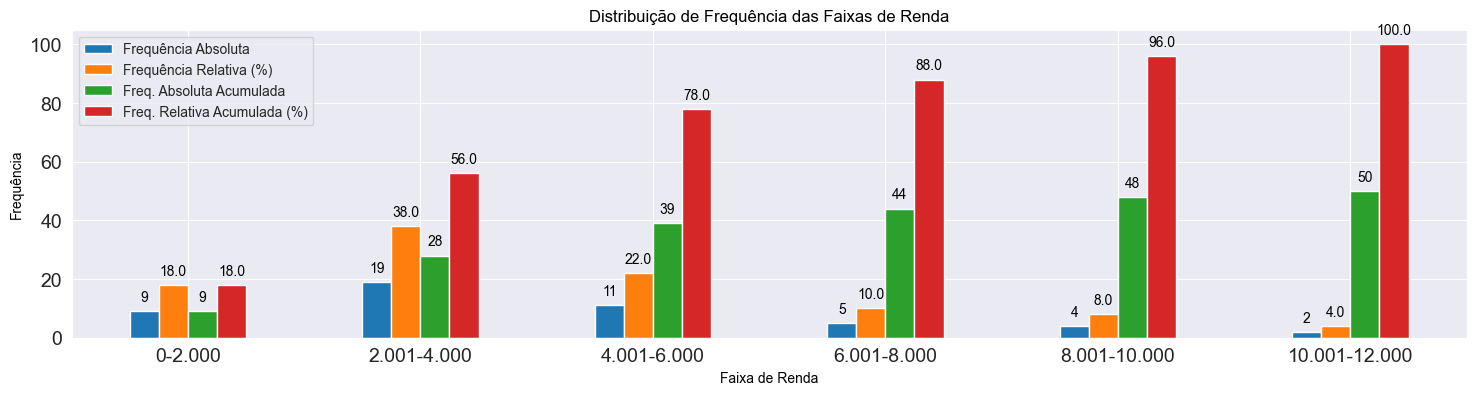

In [3]:
#Gráfico para apresentação visual
ax = grouped.plot(figsize=(18, 4), kind='bar', fontsize=14)
plt.xticks(rotation=0)
ax.set_xlabel('Faixa de Renda', color='black')  # Rótulo para o eixo X
ax.set_ylabel('Frequência', color='black')      # Rótulo para o eixo Y
ax.set_title('Distribuição de Frequência das Faixas de Renda', color='black')  # Título do gráfico

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                xytext=(0, 5),  # Deslocamento do rótulo
                textcoords='offset points',
                ha='center', 
                va='bottom', 
                fontsize=10,
                color='black')
                
plt.show()

```
2. Um analista do mercado acionário coletou os retornos mensais de duas ações que pretende indicar aos seus clientes. Calcule as estatísticas descritivas para as duas variáveis. O banco de dados com os retornos percentuais mensais está na planilha Lista de Exercício Complementares: aba Exercício 2. Posteriormente, analise o coeficiente de correlação de Pearson entre os retornos.

```

In [8]:
# Carregar a planilha e selecionar a aba específica
df = pd.read_excel('Exerc_complement.xlsx', sheet_name='Exercício 2')
df = df[['Meses','Ação 1','Ação 2']].dropna()

# Lista de ações
Acoes = list(df.columns[1:])

# Função para calcular estatísticas personalizadas
def analise_estatistica(serie):
    serie = serie.dropna()
    counts = serie.value_counts()
    moda = counts[counts == counts.max()].index.tolist() if counts.max() > 1 else np.nan
    
    stats_dict = {
        'Nº Observações': len(serie),
        'Média': serie.mean(),
        'Mediana': serie.median(),
        'Moda': moda,
        '1º Quartil': serie.quantile(0.25),
        '3º Quartil': serie.quantile(0.75),
        '8º Decil (20%)': serie.quantile(0.8),
        '9º Decil (60%)': serie.quantile(0.9),
        '27º Percentil': serie.quantile(0.27),
        '64º Percentil': serie.quantile(0.64),
        'Valor Mínimo': serie.min(),
        'Valor Máximo': serie.max(),
        'Amplitude': serie.max() - serie.min(),
        'Amplitude Interquartil (AIQ)': serie.quantile(0.75) - serie.quantile(0.25),
        'Variância': serie.var(ddof=1),
        'Desvio Padrão': serie.std(ddof=1),
        'Erro Padrão da Média': serie.std(ddof=1) / np.sqrt(len(serie)),
        'Coeficiente de Variação (%)': (serie.std(ddof=1) / serie.mean()) * 100 if serie.mean() != 0 else np.nan,
        'Coeficiente de Assimetria': stats.skew(serie),
        'Coeficiente de Curtose': stats.kurtosis(serie),
    }
    return pd.Series(stats_dict)

# Aplicando para cada ação
resultados = pd.DataFrame({Acoes: analise_estatistica(df[Acoes]) for Acoes in Acoes})
resultados

,Ação 1,Ação 2
Nº Observações,23.000000,23.000000
Média,0.035204,0.151135
Mediana,0.037000,0.124800
Moda,NaN,NaN
1º Quartil,-0.061200,0.020400
3º Quartil,0.116050,0.233300
8º Decil (20%),0.125960,0.261900
9º Decil (60%),0.223500,0.427960
27º Percentil,-0.056360,0.020840
64º Percentil,0.076312,0.182500


In [5]:
# Coeficiente de correlação de Pearson
r, p_valor = pearsonr(df[Acoes[0]], df[Acoes[1]])

# Nº de observações
n = df[[Acoes[0], Acoes[1]]].dropna().shape[0]

# Estatística T para a correlação
t_calc = r * np.sqrt((n - 2) / (1 - r**2))

# Valor crítico para 5% de significância (bicaudal)
t_critico = t.ppf(1 - 0.025, df=n - 2)  # 2,5% em cada cauda

# Impressão dos resultados
print("\n📊 Análise de Correlação entre as Ações:\n")
print(f"    Coeficiente de Correlação de Pearson (r): {r:.4f}")
print(f"    Estatística t: {t_calc:.4f}")
print(f"    p-valor (bicaudal): {p_valor:.4f}")
print(f"    Valor crítico t (5%, bicaudal): ±{t_critico:.4f}")

# Teste de hipótese
if abs(t_calc) > t_critico:
    decisao = "Rejeita H₀: Correlação significativa"
else:
    decisao = "Não rejeita H₀: Correlação não significativa"

print("\n📌 Teste de Hipóteses:\n")
print("    H₀: ρ = 0 (Não há correlação)")
print("    H₁: ρ ≠ 0 (Há correlação)")
print(f"\n    {decisao}")


📊 Análise de Correlação entre as Ações:

    Coeficiente de Correlação de Pearson (r): 0.2908
    Estatística t: 1.3929
    p-valor (bicaudal): 0.1782
    Valor crítico t (5%, bicaudal): ±2.0796

📌 Teste de Hipóteses:

    H₀: ρ = 0 (Não há correlação)
    H₁: ρ ≠ 0 (Há correlação)

    Não rejeita H₀: Correlação não significativa


🧪 Interpretação:
- Se o p-valor < 0.05, ou |t| > valor crítico, há evidência de correlação significativa.
- Isso valida se a correlação não é apenas aleatória.